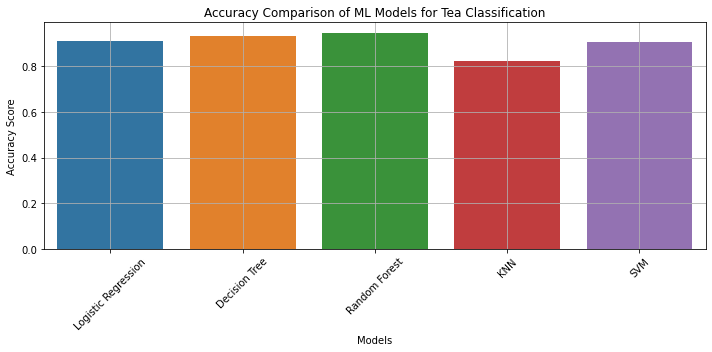

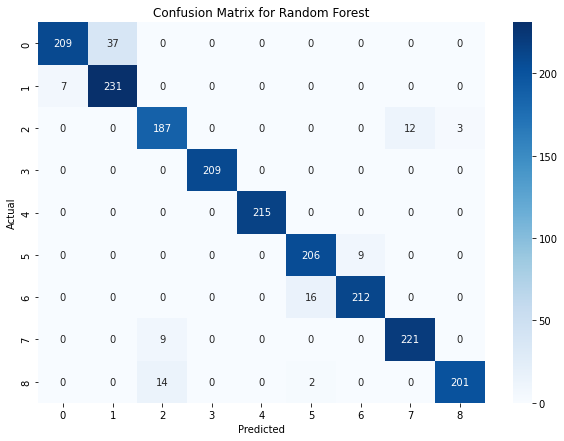

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit-learn libraries for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Importing classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load dataset
df = pd.read_csv("Realistic_Tea_Data_10000.csv")

# Step 2: Encode categorical features (Tea_Type is the target, Leaf_Origin is a feature)
label_encoders = {}
for col in ['Tea_Type', 'Leaf_Origin']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store label encoder for potential inverse transform

# Step 3: Separate features and target
X = df.drop('Tea_Type', axis=1)
y = df['Tea_Type']

# Step 4: Standardize the feature data to ensure even scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Initialize models for comparison
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Step 7: Train each model and store their accuracy and classification report
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

# Step 8: Visualize accuracy of all models using bar plot
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Accuracy Comparison of ML Models for Tea Classification")
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Visualize Confusion Matrix for best performing model (e.g., Random Forest)
plt.figure(figsize=(10, 7))
sns.heatmap(results['Random Forest']['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       246
           1       0.85      0.89      0.87       238
           2       0.81      0.90      0.85       202
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00       215
           5       0.90      0.87      0.89       215
           6       0.89      0.92      0.91       228
           7       0.95      0.90      0.92       230
           8       0.94      0.89      0.92       217

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       246
           1       0.89      0.87      0.88       238
           2       0.88      0.90      0.89     

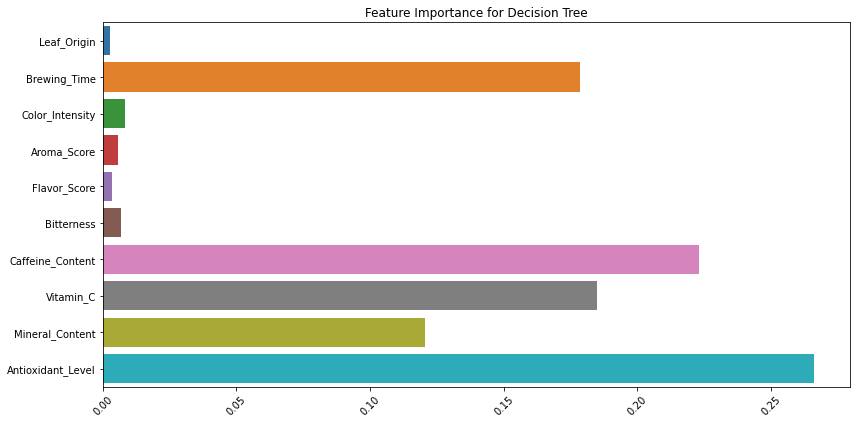


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       246
           1       0.86      0.98      0.92       238
           2       0.88      0.94      0.91       202
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00       215
           5       0.92      0.96      0.94       215
           6       0.96      0.93      0.94       228
           7       0.95      0.95      0.95       230
           8       0.99      0.92      0.95       217

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



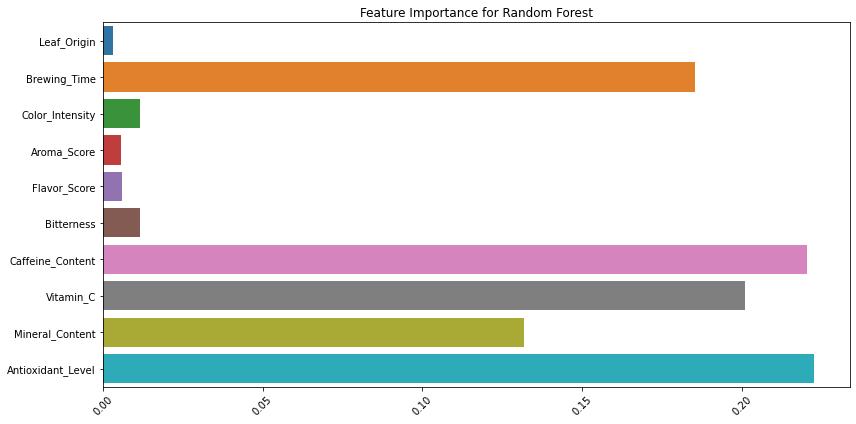


KNN Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       246
           1       0.74      0.84      0.79       238
           2       0.64      0.79      0.71       202
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00       215
           5       0.69      0.85      0.76       215
           6       0.86      0.68      0.76       228
           7       0.87      0.80      0.83       230
           8       0.87      0.73      0.79       217

    accuracy                           0.82      2000
   macro avg       0.83      0.83      0.82      2000
weighted avg       0.83      0.82      0.82      2000


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       246
           1       0.84      0.90      0.87       238
           2       0.81      0.87      0.84       202
           3       1

In [3]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Feature importance block (only for RF, DT)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        plt.figure(figsize=(12,6))
        sns.barplot(x=importances, y=features)
        plt.title(f"Feature Importance for {name}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

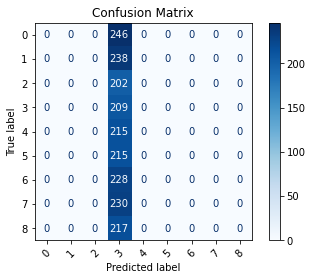

In [13]:
# Step 0: Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the 'Tea_Type' column
label_encoder = LabelEncoder()
df['Tea_Type'] = label_encoder.fit_transform(df['Tea_Type'])

# Step 2: Define your features and target
X = df.drop('Tea_Type', axis=1)
y = df['Tea_Type']

# Step 3: Save the original class labels for later use (confusion matrix)
tea_labels = label_encoder.classes_

# Step 4: Proceed to split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the model
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with correct labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tea_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Predict one sample
sample = X.iloc[0:1]
pred = model.predict(sample)

# ✅ Use the label encoder used earlier
print("Predicted Tea Type:", label_encoder.inverse_transform(pred)[0])

Predicted Tea Type: 3
